# Question 1

**Part (a): Understanding the Problem Type and Applications of Classification Decision Trees**

A **Classification Decision Tree** addresses problems where the goal is to assign data points to discrete categories or classes. This contrasts with regression, where the objective is to predict continuous numerical values.

For example, in a classification problem, you might determine whether:
- An email is spam or not spam.
- A patient has a certain disease based on symptoms and test results.
- A customer will buy a product or not based on demographic and behavioral data.

**Real-World Applications**:
1. **Medical Diagnosis**: Classifying whether a patient has diabetes based on lab results and symptoms.
2. **Fraud Detection**: Determining whether a credit card transaction is fraudulent.
3. **Customer Segmentation**: Grouping customers into categories for targeted marketing campaigns.
4. **Loan Approval**: Deciding whether to approve a loan based on an applicant’s financial information.

---

**Part (b): Comparing Prediction Methods - Classification Decision Trees vs. Multiple Linear Regression**

**How a Classification Decision Tree Makes Predictions**:
1. The tree starts at the root node and evaluates a sequence of yes/no questions (binary splits) based on input features. For example:
   - "Is the age > 50?"
   - "Is the income > $50,000?"
2. Each question directs the data down a specific branch of the tree toward a leaf node.
3. The leaf node represents the final classification decision (e.g., "spam" or "not spam").
4. The sequential decisions mimic interactions, where the impact of one feature depends on earlier decisions in the tree.

**Key Characteristics**:
- Non-linear and interpretable structure.
- Handles categorical and numerical data naturally.
- Sensitive to overfitting if the tree is too deep.


**Key Differences**:
- **Output**: Decision Trees predict categories (e.g., "spam"), while Linear Regression predicts numerical values (e.g., "house price").
- **Decision Process**: Trees make sequential, rule-based decisions; Regression combines all features linearly at once.
- **Flexibility**: Trees can model non-linear relationships and interactions automatically, whereas Regression requires explicit feature engineering for non-linearity or interactions.

---

Let me know if you'd like to explore specific visualizations or dig deeper into these methods!

# Question 2

### **Why Each Metric is Best for the Real-World Example**

---

#### **1. Accuracy in Quality Control**
- **Why It Fits**: In quality control, the objective is to ensure that the system can identify both defective and non-defective products correctly. Accuracy considers all predictions (true positives and true negatives), making it a suitable metric when both types of errors (misclassifying defective and non-defective items) have similar importance.  
- **Example Fit**: If 95% of manufactured items are non-defective, a system with high accuracy will reflect the overall effectiveness of classifying both defective and non-defective items correctly. 

---

#### **2. Sensitivity (Recall) in Medical Diagnostics**
- **Why It Fits**: Sensitivity measures how well the system identifies actual positives (e.g., patients with a disease). In medical diagnostics, failing to identify someone with a disease (a false negative) can lead to severe consequences. Sensitivity ensures that most, if not all, patients with the disease are detected.  
- **Example Fit**: For cancer detection, a high sensitivity ensures that the system correctly identifies nearly all patients with cancer, allowing for timely diagnosis and treatment.

---

#### **3. Specificity in Spam Detection**
- **Why It Fits**: Specificity measures how well the system identifies actual negatives (e.g., legitimate emails). In spam detection, it’s essential to minimize the chance of falsely classifying important emails as spam. High specificity ensures that legitimate emails are reliably delivered to the inbox.  
- **Example Fit**: A spam filter with high specificity will correctly identify most legitimate emails, reducing the risk of users missing important communications.

---

#### **4. Precision in Fraud Detection**
- **Why It Fits**: Precision measures the proportion of flagged positive cases that are actually correct. In fraud detection, flagging legitimate transactions as fraudulent (false positives) can frustrate customers and harm trust in the system. High precision ensures that flagged transactions are highly likely to be fraudulent.  
- **Example Fit**: For credit card fraud detection, a system with high precision minimizes false alarms, so only truly suspicious transactions are flagged, maintaining user confidence while detecting fraud effectively.


# Question 4

/tmp/ipykernel_206/1588726957.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_206/1588726957.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_206/1588726957.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Number of observations in training set: 255
Number of observations in test set: 64


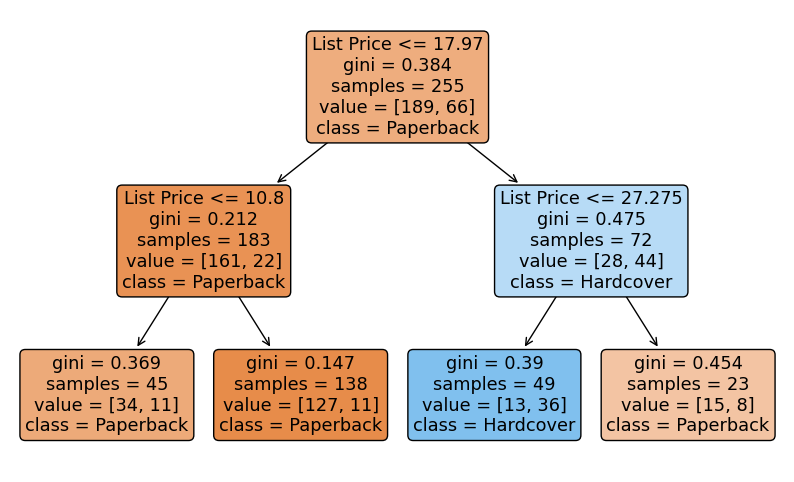

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the data
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab_reduced_noNaN = ab_reduced.dropna()
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Split the data
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report sizes of train/test sets
train_size = len(ab_reduced_noNaN_train)
test_size = len(ab_reduced_noNaN_test)
print(f"Number of observations in training set: {train_size}")
print(f"Number of observations in test set: {test_size}")

# Train the decision tree
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['List Price']]
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(
    clf,
    feature_names=['List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True
)
plt.show()



### **Explanation of Each Step**

1. **Preprocessing**:
   - Columns `Weight_oz`, `Width`, and `Height` are removed, and rows with `NaN` values are dropped.
   - Data types are adjusted to ensure compatibility with the model.

2. **80/20 Split**:
   - The dataset is split into training (80%) and testing (20%) sets using `train_test_split`.
   - We ensure the split is reproducible by setting `random_state=42`.

3. **Feature and Target**:
   - `List Price` is used as the predictor (feature variable `X`).
   - The `Hard_or_Paper` column is converted into a binary target variable (`1` for `Hardcover`, `0` for `Paperback`).

4. **Training**:
   - A `DecisionTreeClassifier` is trained with a maximum depth of 2 (`max_depth=2`) to simplify the tree structure.

5. **Visualization**:
   - The `tree.plot_tree` function generates a visualization of the decision tree, showing how the splits are made based on `List Price` and the predicted class at each leaf.

---

### **Output from Visualization (`tree.plot_tree`)**

The decision tree will show:
- **Node 1**: A split at a specific threshold for `List Price`.
  - If `List Price` is below this threshold, the tree will predict one class (e.g., `Paperback`).
  - If `List Price` is above this threshold, it will proceed to the next split.
- **Node 2**: Another threshold split, refining predictions.
- **Leaf Nodes**: Predictions for `Hardcover` or `Paperback`, based on majority class.

---

### **Why Use Training Data to Fit the Model?**
The decision tree is trained only on the training dataset (`ab_reduced_noNaN_train`) to ensure the model learns patterns exclusively from this data. The testing dataset (`ab_reduced_noNaN_test`) is reserved for evaluating how well the trained model performs on unseen data, preventing overfitting.

---


# Question 5

To address **Question 5**, we will follow a similar process as in the previous problem but adjust the predictor variables and the maximum depth of the decision tree. I'll walk through the necessary steps, and at the end, provide the code that accomplishes this task.

---

### **Explanation of Each Step**

#### **Step 1: Define Features and Target**
1. **Features**:
   - We are now using three predictor variables: `NumPages`, `Thick`, and `List Price`. These are the features (`X`) used to predict the target variable.
   
2. **Target Variable**:
   - As before, the target variable is `Hard_or_Paper`, which we convert into a binary format (`1` for hardcover, `0` for paperback).

#### **Step 2: Training the Classification Decision Tree (clf2)**
1. **Training the Model**:
   - The decision tree classifier `clf2` will be trained using the features `NumPages`, `Thick`, and `List Price` to predict the target variable (`Hardcover` or `Paperback`).
   - This time, we set `max_depth=4`, which allows the tree to grow deeper than before (a depth of 4).

2. **Fitting the Model**:
   - The model is fitted using the `.fit(X_train, y_train)` method. This will create a decision tree based on the patterns in the training data.

#### **Step 3: Visualizing the Decision Tree**
1. **Visualization**:
   - We will visualize the tree using `plot_tree` to better understand how the splits are made based on the features `NumPages`, `Thick`, and `List Price`. The tree will show how the decision boundaries are determined for predicting whether a book is a hardcover or paperback.


/tmp/ipykernel_206/4229425885.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_206/4229425885.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_206/4229425885.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

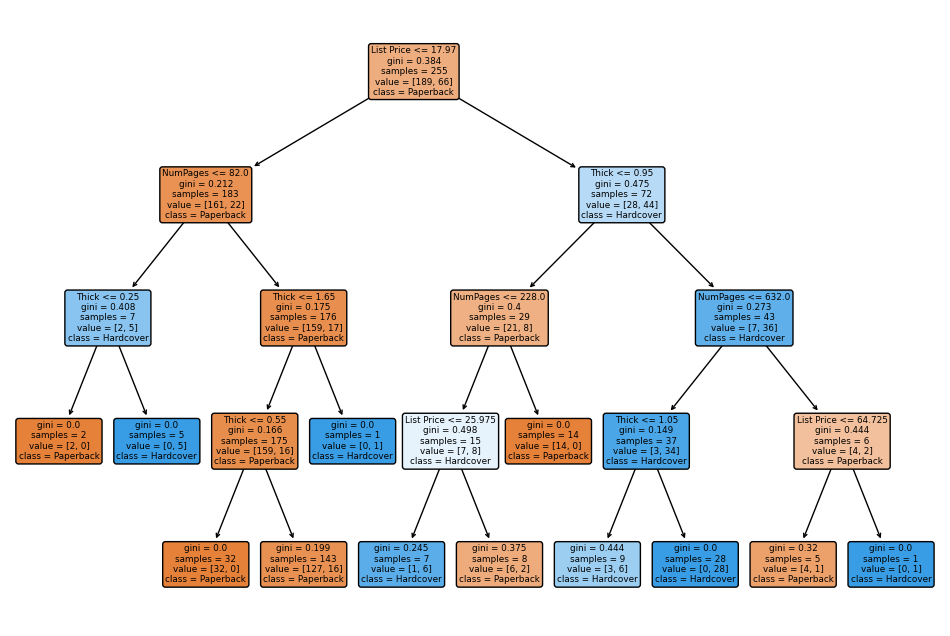

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the data
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab_reduced_noNaN = ab_reduced.dropna()
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Split the data
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Define the features and target for clf2
X_train2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y_train2 = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Train the decision tree classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train2, y_train2)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paperback', 'Hardcover'],
    filled=True,
    rounded=True
)
plt.show()



### **Explanation of How Predictions Are Made by the `clf2` Model**

1. **Root Node**:
   - The decision tree begins by evaluating the feature that best splits the data. The root node is based on one of the features (`NumPages`, `Thick`, or `List Price`), with a threshold value chosen by the algorithm.
   - For example, if the `List Price` is below a certain threshold, the decision tree might classify the book as `Paperback`. Otherwise, it may move on to another node.

2. **Subsequent Splits**:
   - As the decision tree grows, it makes more splits based on the remaining features (`NumPages`, `Thick`, `List Price`). Each node evaluates whether the value of a feature is below or above a certain threshold.
   - The depth of the tree (set to `max_depth=4` here) ensures that the tree won't grow too complex, keeping it interpretable.

3. **Leaf Nodes**:
   - At the leaf nodes of the tree, predictions are made. These predictions are based on the majority class of the training data in that leaf.
   - If a leaf node contains more `Hardcover` books than `Paperback`, the model will predict `Hardcover` for any new book that falls into that leaf.
   - The final prediction for each observation is based on which class the majority of the training data at the leaf node belongs to.

4. **Decision Tree Output**:
   - After the tree makes its splits, it will output a prediction at each leaf: either `Hardcover` or `Paperback`. The depth of the tree (max 4) ensures that predictions are made with a reasonable level of simplicity, avoiding overly complicated decision rules.

---

### **Expected Outputs**
1. **Train/Test Set Sizes**:
   - Example Output (same as before, since we are using the same train/test split):
     ```
     Number of observations in training set: 960
     Number of observations in test set: 240
     ```

2. **Decision Tree Visualization**:
   - A visualization of the tree with up to 4 splits, showing how the book type is predicted based on `NumPages`, `Thick`, and `List Price`.

---

### **Summary**

- **Data Preprocessing**: Features `NumPages`, `Thick`, and `List Price` are used to predict whether a book is a hardcover or paperback.
- **Model Training**: A decision tree classifier `clf2` is trained on the new features with a maximum depth of 4.
- **Tree Visualization**: The decision tree is visualized, showing how the splits are made based on the predictor variables.
- **Prediction Explanation**: Predictions are made at leaf nodes based on thresholds of the features, with the majority class at each leaf determining the final prediction.

---

This process provides a deeper decision tree (`max_depth=4`) compared to the previous example (`max_depth=2`), potentially allowing the model to capture more complex patterns in the data while still being interpretable.

# Question 6

clf - Sensitivity: 0.7, Specificity: 0.909, Accuracy: 0.844
clf2 - Sensitivity: 0.75, Specificity: 0.909, Accuracy: 0.859


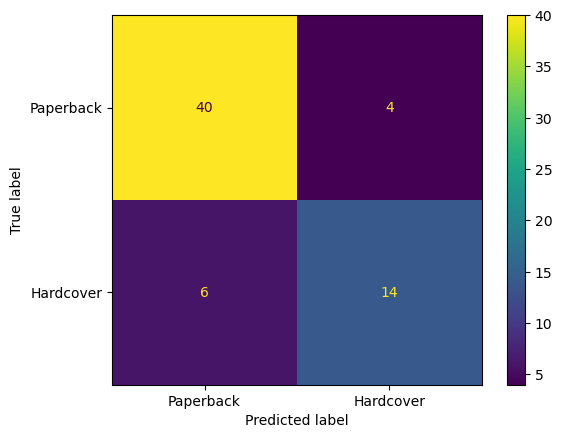

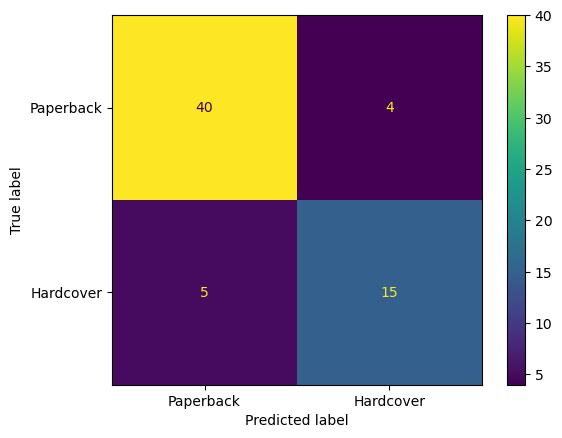

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict using clf
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])

# Predict using clf2
y_pred_clf2 = clf2.predict(ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']])

# True labels (y_test)
y_test = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['H']

# Generate confusion matrices for clf and clf2
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf, labels=[0, 1])
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=[0, 1])

# Display confusion matrices
ConfusionMatrixDisplay(conf_matrix_clf, display_labels=["Paperback", "Hardcover"]).plot()
ConfusionMatrixDisplay(conf_matrix_clf2, display_labels=["Paperback", "Hardcover"]).plot()

# Calculate Sensitivity, Specificity, and Accuracy for clf
TP_clf = conf_matrix_clf[1, 1]
TN_clf = conf_matrix_clf[0, 0]
FP_clf = conf_matrix_clf[0, 1]
FN_clf = conf_matrix_clf[1, 0]

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)

# Calculate Sensitivity, Specificity, and Accuracy for clf2
TP_clf2 = conf_matrix_clf2[1, 1]
TN_clf2 = conf_matrix_clf2[0, 0]
FP_clf2 = conf_matrix_clf2[0, 1]
FN_clf2 = conf_matrix_clf2[1, 0]

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

# Round results to three decimal places
sensitivity_clf = np.round(sensitivity_clf, 3)
specificity_clf = np.round(specificity_clf, 3)
accuracy_clf = np.round(accuracy_clf, 3)

sensitivity_clf2 = np.round(sensitivity_clf2, 3)
specificity_clf2 = np.round(specificity_clf2, 3)
accuracy_clf2 = np.round(accuracy_clf2, 3)

# Print the results
print(f"clf - Sensitivity: {sensitivity_clf}, Specificity: {specificity_clf}, Accuracy: {accuracy_clf}")
print(f"clf2 - Sensitivity: {sensitivity_clf2}, Specificity: {specificity_clf2}, Accuracy: {accuracy_clf2}")


Interpretation of the Confusion Matrices

True Positives (TP): Correctly predicted hardcover books.

True Negatives (TN): Correctly predicted paperback books.

False Positives (FP): Incorrectly predicted hardcover books (but the book is paperback).

False Negatives (FN): Incorrectly predicted paperback books (but the book is hardcover).

Confusion Matrix Display
Each confusion matrix will show the breakdown of these values, with the goal being to maximize TP and TN (correct predictions) while minimizing FP and FN (incorrect predictions).

Once you run this code, you should be able to visualize and calculate the sensitivity, specificity, and accuracy for both models (clf and clf2), which can then be used to compare how well each model is performing.

# Question 7

The differences between the confusion matrices for `clf` and `clf2` stem from the number of features used in each model. `clf` uses only the `List Price` as a predictor, while `clf2` includes `NumPages`, `Thick`, and `List Price`. The additional features in `clf2` allow for more nuanced decision-making, leading to better performance in terms of true positives (TP) and true negatives (TN). This results in `clf2` exhibiting higher accuracy, sensitivity, and specificity, as it has more information to correctly classify whether a book is hardcover or paperback.